In [73]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from statsmodels.stats.diagnostic import acorr_ljungbox
from scipy import stats
import pylab
import pandas as pd
import pathlib
plt.style.use('fivethirtyeight')
from utils import plotUtils
import datetime as dt
import matplotlib.dates as mdates
import statsmodels.api as sm
from scipy.stats import norm
import statistics

In [61]:
fname_gas = pathlib.Path().resolve() / "data" / "FuturosGasNatural.csv"
fname_petroleo_brent = pathlib.Path().resolve() / "data" / "FuturosPetroleoBrent.csv"
fname_carbon = pathlib.Path().resolve() / "data" / "FuturosCarbon.csv"
gas = pd.read_csv(fname_gas, decimal=',')
petroleo_brent = pd.read_csv(fname_petroleo_brent, decimal=',')
carbon = pd.read_csv(fname_carbon, decimal='.')
petroleo_brent

,Fecha,Último,Apertura,Máximo,Mínimo,Vol.,% var.
0,19.05.2022,111.30,108.10,112.30,105.71,"270,76K","1,88%"
1,18.05.2022,109.25,112.90,114.14,108.39,"244,17K","-3,17%"
2,17.05.2022,112.83,114.26,115.68,111.10,"275,24K","-1,05%"
3,16.05.2022,114.03,112.40,114.77,109.01,"215,80K","1,44%"
4,15.05.2022,112.41,111.80,112.49,111.52,"4,38K","1,07%"
...,...,...,...,...,...,...,...
3725,08.01.2008,95.54,94.77,96.69,94.47,"121,23K","1,22%"
3726,07.01.2008,94.39,96.69,97.48,93.72,"106,50K","-2,48%"
3727,04.01.2008,96.79,97.77,98.00,96.18,"98,47K","-0,83%"
3728,03.01.2008,97.60,97.45,98.50,97.04,"84,86K","-0,25%"


# Varias figuras en la misma

In [62]:
def compoundReturn(dataFrame):
    array = np.empty(dataFrame.size)
    for i in dataFrame.index:
        array[i] = 100 * np.log(dataFrame[i+1] / dataFrame[i])
        if (i + 1 == dataFrame.size - 1):
            break
    return array[::-1]

In [63]:
# 3 es el último
last_price_day_gas = gas["Último"][np.logical_not(np.isnan(gas["Último"]))]
gas_return = compoundReturn(last_price_day_gas)
gas_return

array([ 6.95200757e-310,  2.26755400e+000, -2.15283854e+000, ...,
       -4.28109654e+000, -7.67758090e-001,  3.19337521e+000])

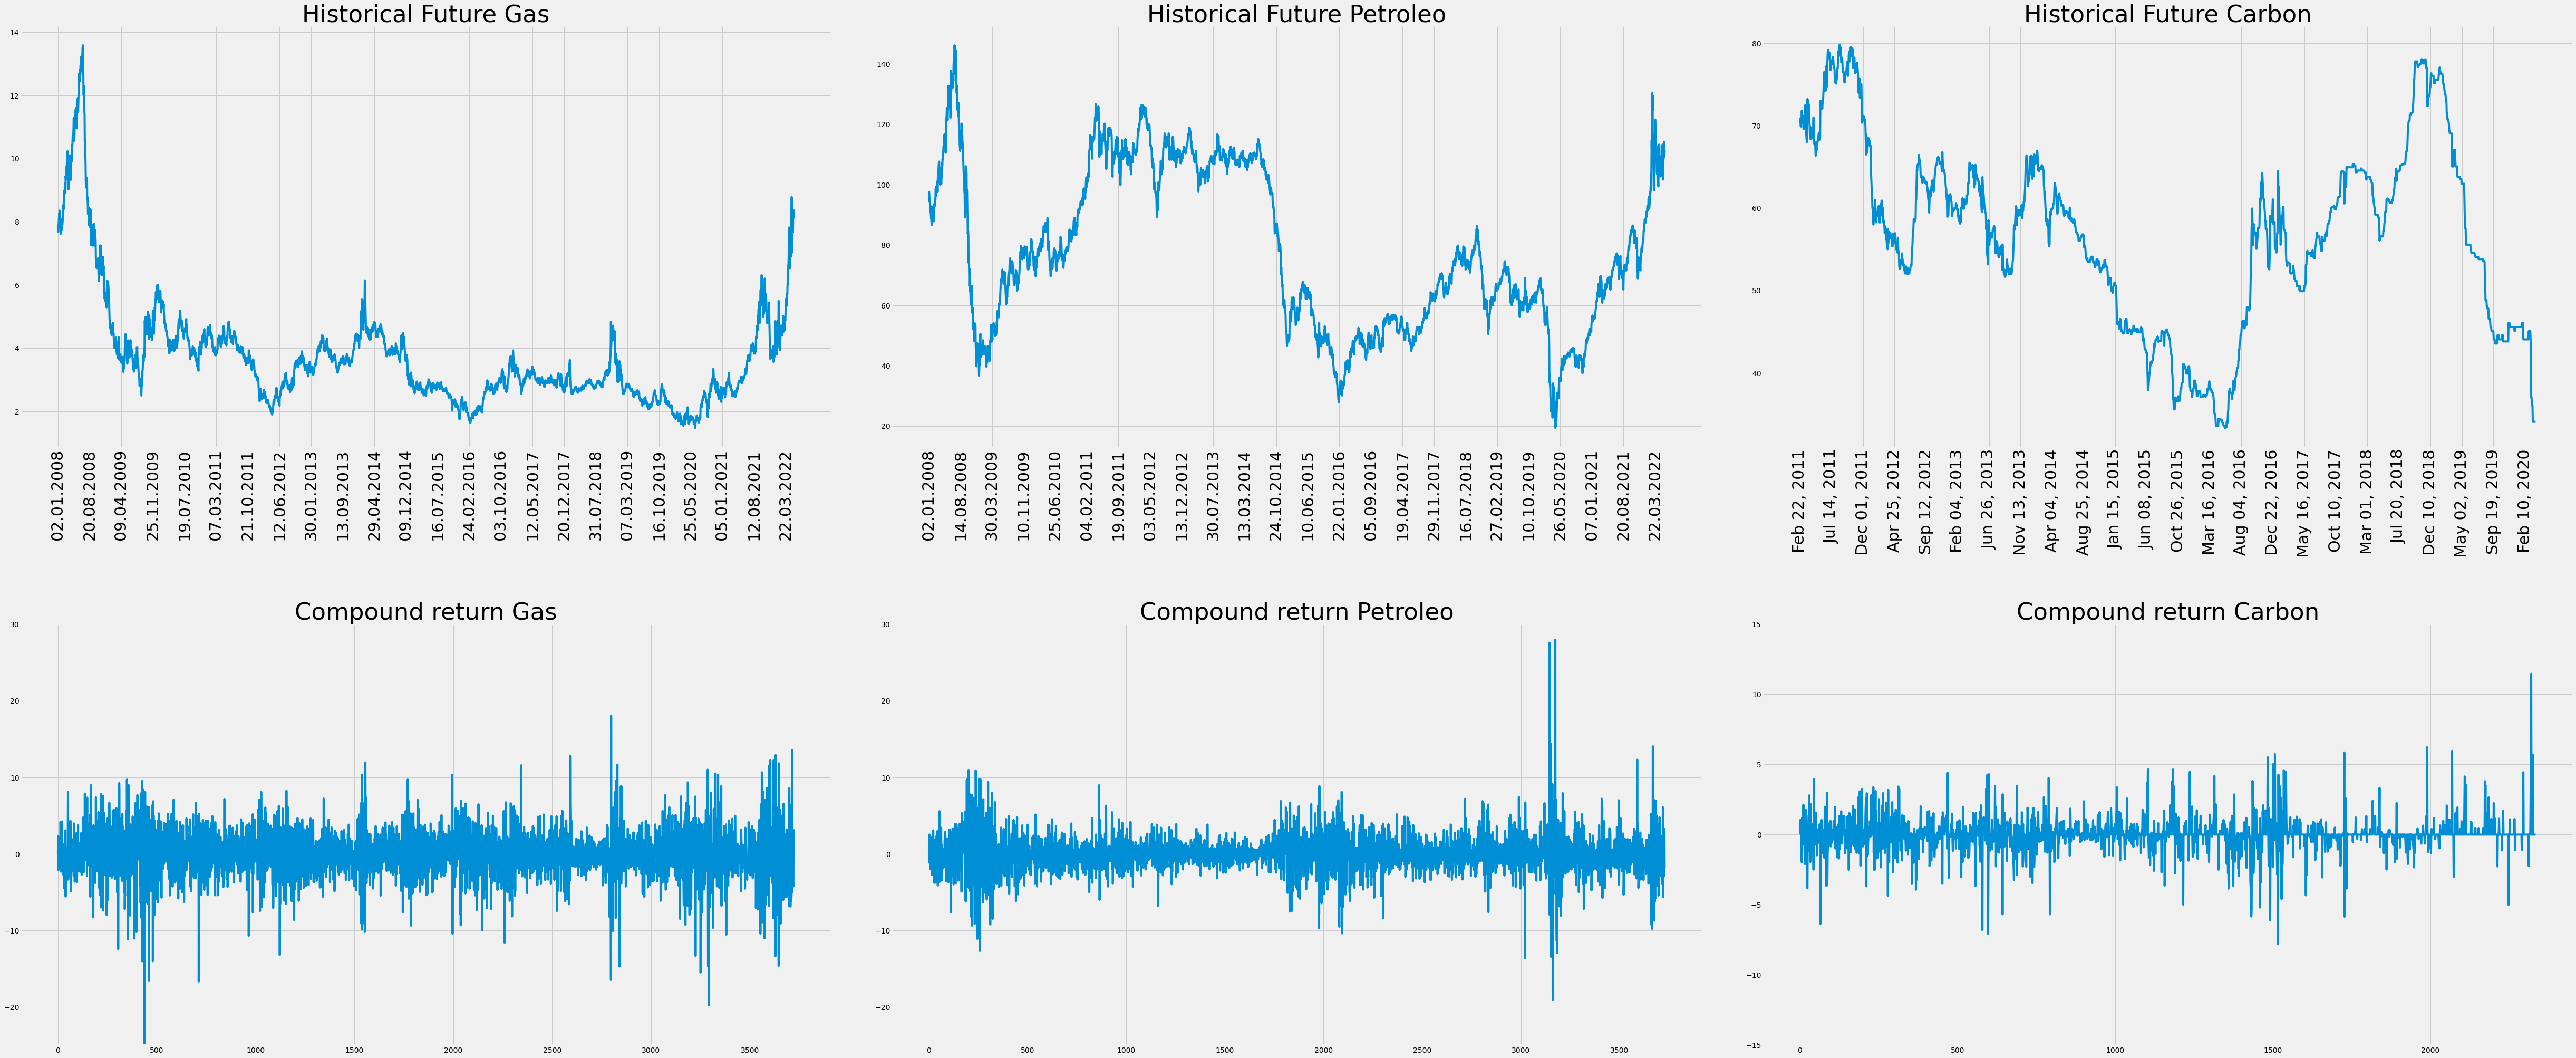

In [64]:
fig, ax = plt.subplots(figsize = (70, 30), nrows=2, ncols=3)

# GAS ######################################################
dates = gas["Fecha"][::-1]
last_price_day_gas = gas["Último"][np.logical_not(np.isnan(gas["Último"]))]
gas_return = compoundReturn(last_price_day_gas)
# Historical
ax[0,0].plot(dates, last_price_day_gas[::-1])
ax[0,0].fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
ax[0,0].tick_params(axis='x', labelsize=30,rotation=90, bottom=0.3)
ax[0,0].set_xticks(np.arange(0, len(dates),160, dtype=float))
ax[0,0].set_title('Historical Future Gas', fontsize = 45)
# Compound Return 
ax[1,0].set_ylim([-25, 30])
ax[1,0].plot(np.arange(0, len(gas_return)), gas_return)
ax[1,0].set_title('Compound return Gas', fontsize = 45)
# # Petroleo #################################################
dates = petroleo_brent["Fecha"][::-1]
last_price_day_petroleo = petroleo_brent["Último"][np.logical_not(np.isnan(petroleo_brent["Último"]))]
petroleo_return = compoundReturn(last_price_day_petroleo)
# Historical
ax[0,1].plot(dates, last_price_day_petroleo[::-1])
ax[0,1].fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
ax[0,1].tick_params(axis='x', labelsize=30,rotation=90, bottom=0.3)
ax[0,1].set_xticks(np.arange(0, len(dates),160, dtype=float))
ax[0,1].set_title('Historical Future Petroleo', fontsize = 45)
# Compound Return 
ax[1,1].set_ylim([-25, 30])
ax[1,1].plot(np.arange(0, len(petroleo_return)), petroleo_return)
ax[1,1].set_title('Compound return Petroleo', fontsize = 45)
# # Carbon ###################################################
dates = carbon["Date"][::-1]
last_price_day_carbon = carbon["Price"][np.logical_not(np.isnan(carbon["Price"]))]
carbon_return = compoundReturn(last_price_day_carbon)
# Historical
ax[0,2].plot(dates, last_price_day_carbon[::-1])
ax[0,2].fmt_xdata = mdates.DateFormatter('%Y-%m-%d')
ax[0,2].tick_params(axis='x', labelsize=30,rotation=90, bottom=0.3)
ax[0,2].set_xticks(np.arange(0, len(dates),100, dtype=float))
ax[0,2].set_title('Historical Future Carbon', fontsize = 45)
# Compound Return 
ax[1,2].set_ylim([-15, 15])
ax[1,2].plot(np.arange(0, len(carbon_return)), carbon_return)
ax[1,2].set_title('Compound return Carbon', fontsize = 45)

fig.tight_layout(pad=6)

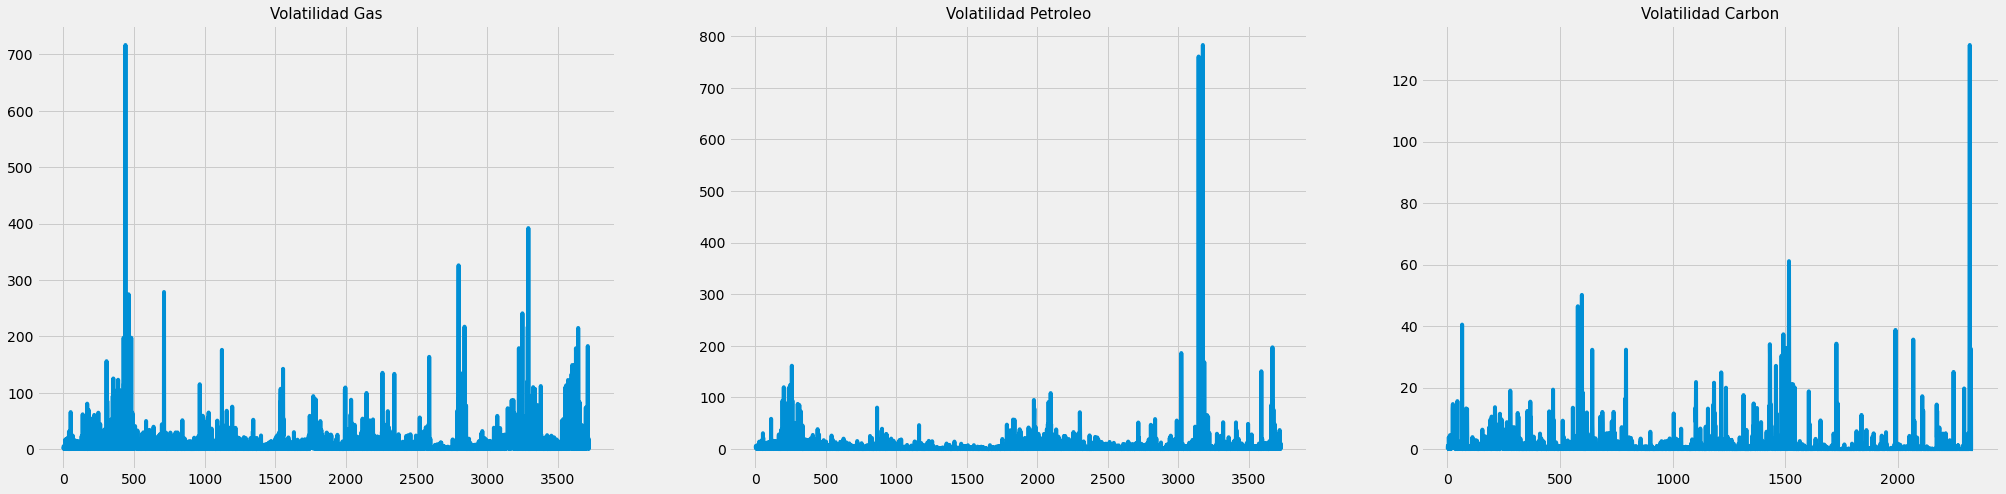

In [65]:
fig, ax = plt.subplots(figsize = (30, 9), nrows=1, ncols=3)

# GAS ######################################################
volatilidad = np.square(gas_return)

ax[0].plot(np.arange(0, len(volatilidad)), volatilidad)
ax[0].set_title('Volatilidad Gas', fontsize = 15)
fig.tight_layout(pad=6)

# Petroleo ######################################################
volatilidad = np.square(petroleo_return)

ax[1].plot(np.arange(0, len(volatilidad)), volatilidad)
ax[1].set_title('Volatilidad Petroleo', fontsize = 15)
fig.tight_layout(pad=6)

# Carbon ######################################################
volatilidad = np.square(carbon_return)

ax[2].plot(np.arange(0, len(volatilidad)), volatilidad)
ax[2].set_title('Volatilidad Carbon', fontsize = 15)
fig.tight_layout(pad=6)

Text(0.5, 1.0, 'Correlogram Carbon')

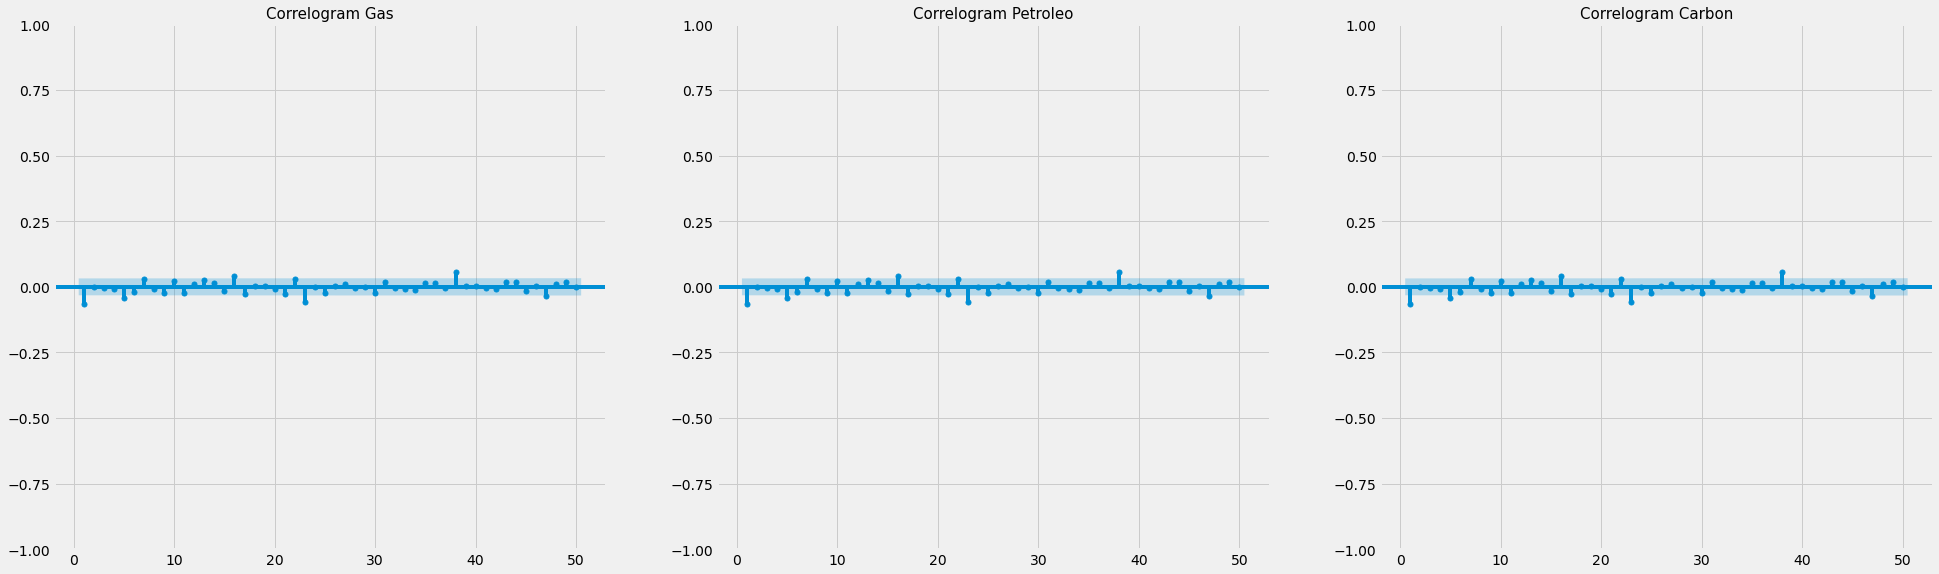

In [66]:
fig, ax = plt.subplots(figsize = (30, 9), nrows=1, ncols=3)

# GAS ######################################################

sm.graphics.tsa.plot_acf(x=gas_return, lags=50, zero=False, title= 'Correlograma Gas', ax=ax[0])
ax[0].set_title('Correlogram Gas', fontsize = 15)

# PETROLEO ######################################################

sm.graphics.tsa.plot_acf(x=gas_return, lags=50, zero=False, title= 'Correlograma Gas', ax=ax[1])
ax[1].set_title('Correlogram Petroleo', fontsize = 15)

# CARBON ######################################################

sm.graphics.tsa.plot_acf(x=gas_return, lags=50, zero=False, title= 'Correlograma Gas', ax=ax[2])
ax[2].set_title('Correlogram Carbon', fontsize = 15)

## Estadistica descriptiva

#### Mean

In [67]:
np.mean(gas_return)

-0.000858882949847435

In [68]:
np.mean(petroleo_return)

-0.0034556505872004096

In [69]:
np.nanmean(carbon_return)

0.03147108541523753

## Mediana

In [123]:
np.median(gas_return)

3.47604671677965e-310

In [122]:
np.median(petroleo_return)

-0.07845915880553418

In [121]:
np.median(carbon_return)

0.0

### Desviación Estandar

In [74]:
np.std(gas_return)

3.171770183539338

In [75]:
np.std(petroleo_return)

2.425985472254448

In [76]:
np.std(carbon_return)

1.1781370802812798

# Max and Min

In [77]:
gas_return.max()

18.054517395020035

In [78]:
gas_return.min()

-26.77118707940863

In [79]:
petroleo_return.max()

27.976149608285578

In [80]:
petroleo_return.min()

-19.07740120271406

In [81]:
carbon_return.max()

11.462916955936134

In [82]:
carbon_return.min()

-7.817107525780166

### Swekness

In [83]:
stats.skew(gas_return)

-0.4405577499084189

In [84]:
stats.skew(petroleo_return)

0.6778484810985486

In [85]:
stats.skew(carbon_return)

0.1349774316989279

### kurstosis

In [124]:
stats.kurtosis(gas_return, fisher=False)

7.375483280297577

In [125]:
stats.kurtosis(petroleo_return, fisher=False)

16.771826900305758

In [127]:
stats.kurtosis(carbon_return, fisher=False)

14.158324295220257

## Histogram + BoxPlot

In [118]:
def addNorm(data, ax):
  # Fit a normal distribution to
  # the data:
  # mean and standard deviation
  mu, std = norm.fit(data) 
    
  # Plot the PDF.
  xmin, xmax = plt.xlim()
  x = np.linspace(xmin, xmax, 100)
  p = norm.pdf(x, mu, std)
  ax.plot(x, p, 'k', linewidth=7, color='r')

/var/folders/pr/mdnfvb3x5l3cn_qcjv5rxzqr0000gn/T/ipykernel_99542/1837531769.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(x, p, 'k', linewidth=7, color='r')
/var/folders/pr/mdnfvb3x5l3cn_qcjv5rxzqr0000gn/T/ipykernel_99542/1837531769.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(x, p, 'k', linewidth=7, color='r')
/var/folders/pr/mdnfvb3x5l3cn_qcjv5rxzqr0000gn/T/ipykernel_99542/1837531769.py:11: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k" (-> color=(0.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  ax.plot(x, p, 'k', linewidth=7, color='r')


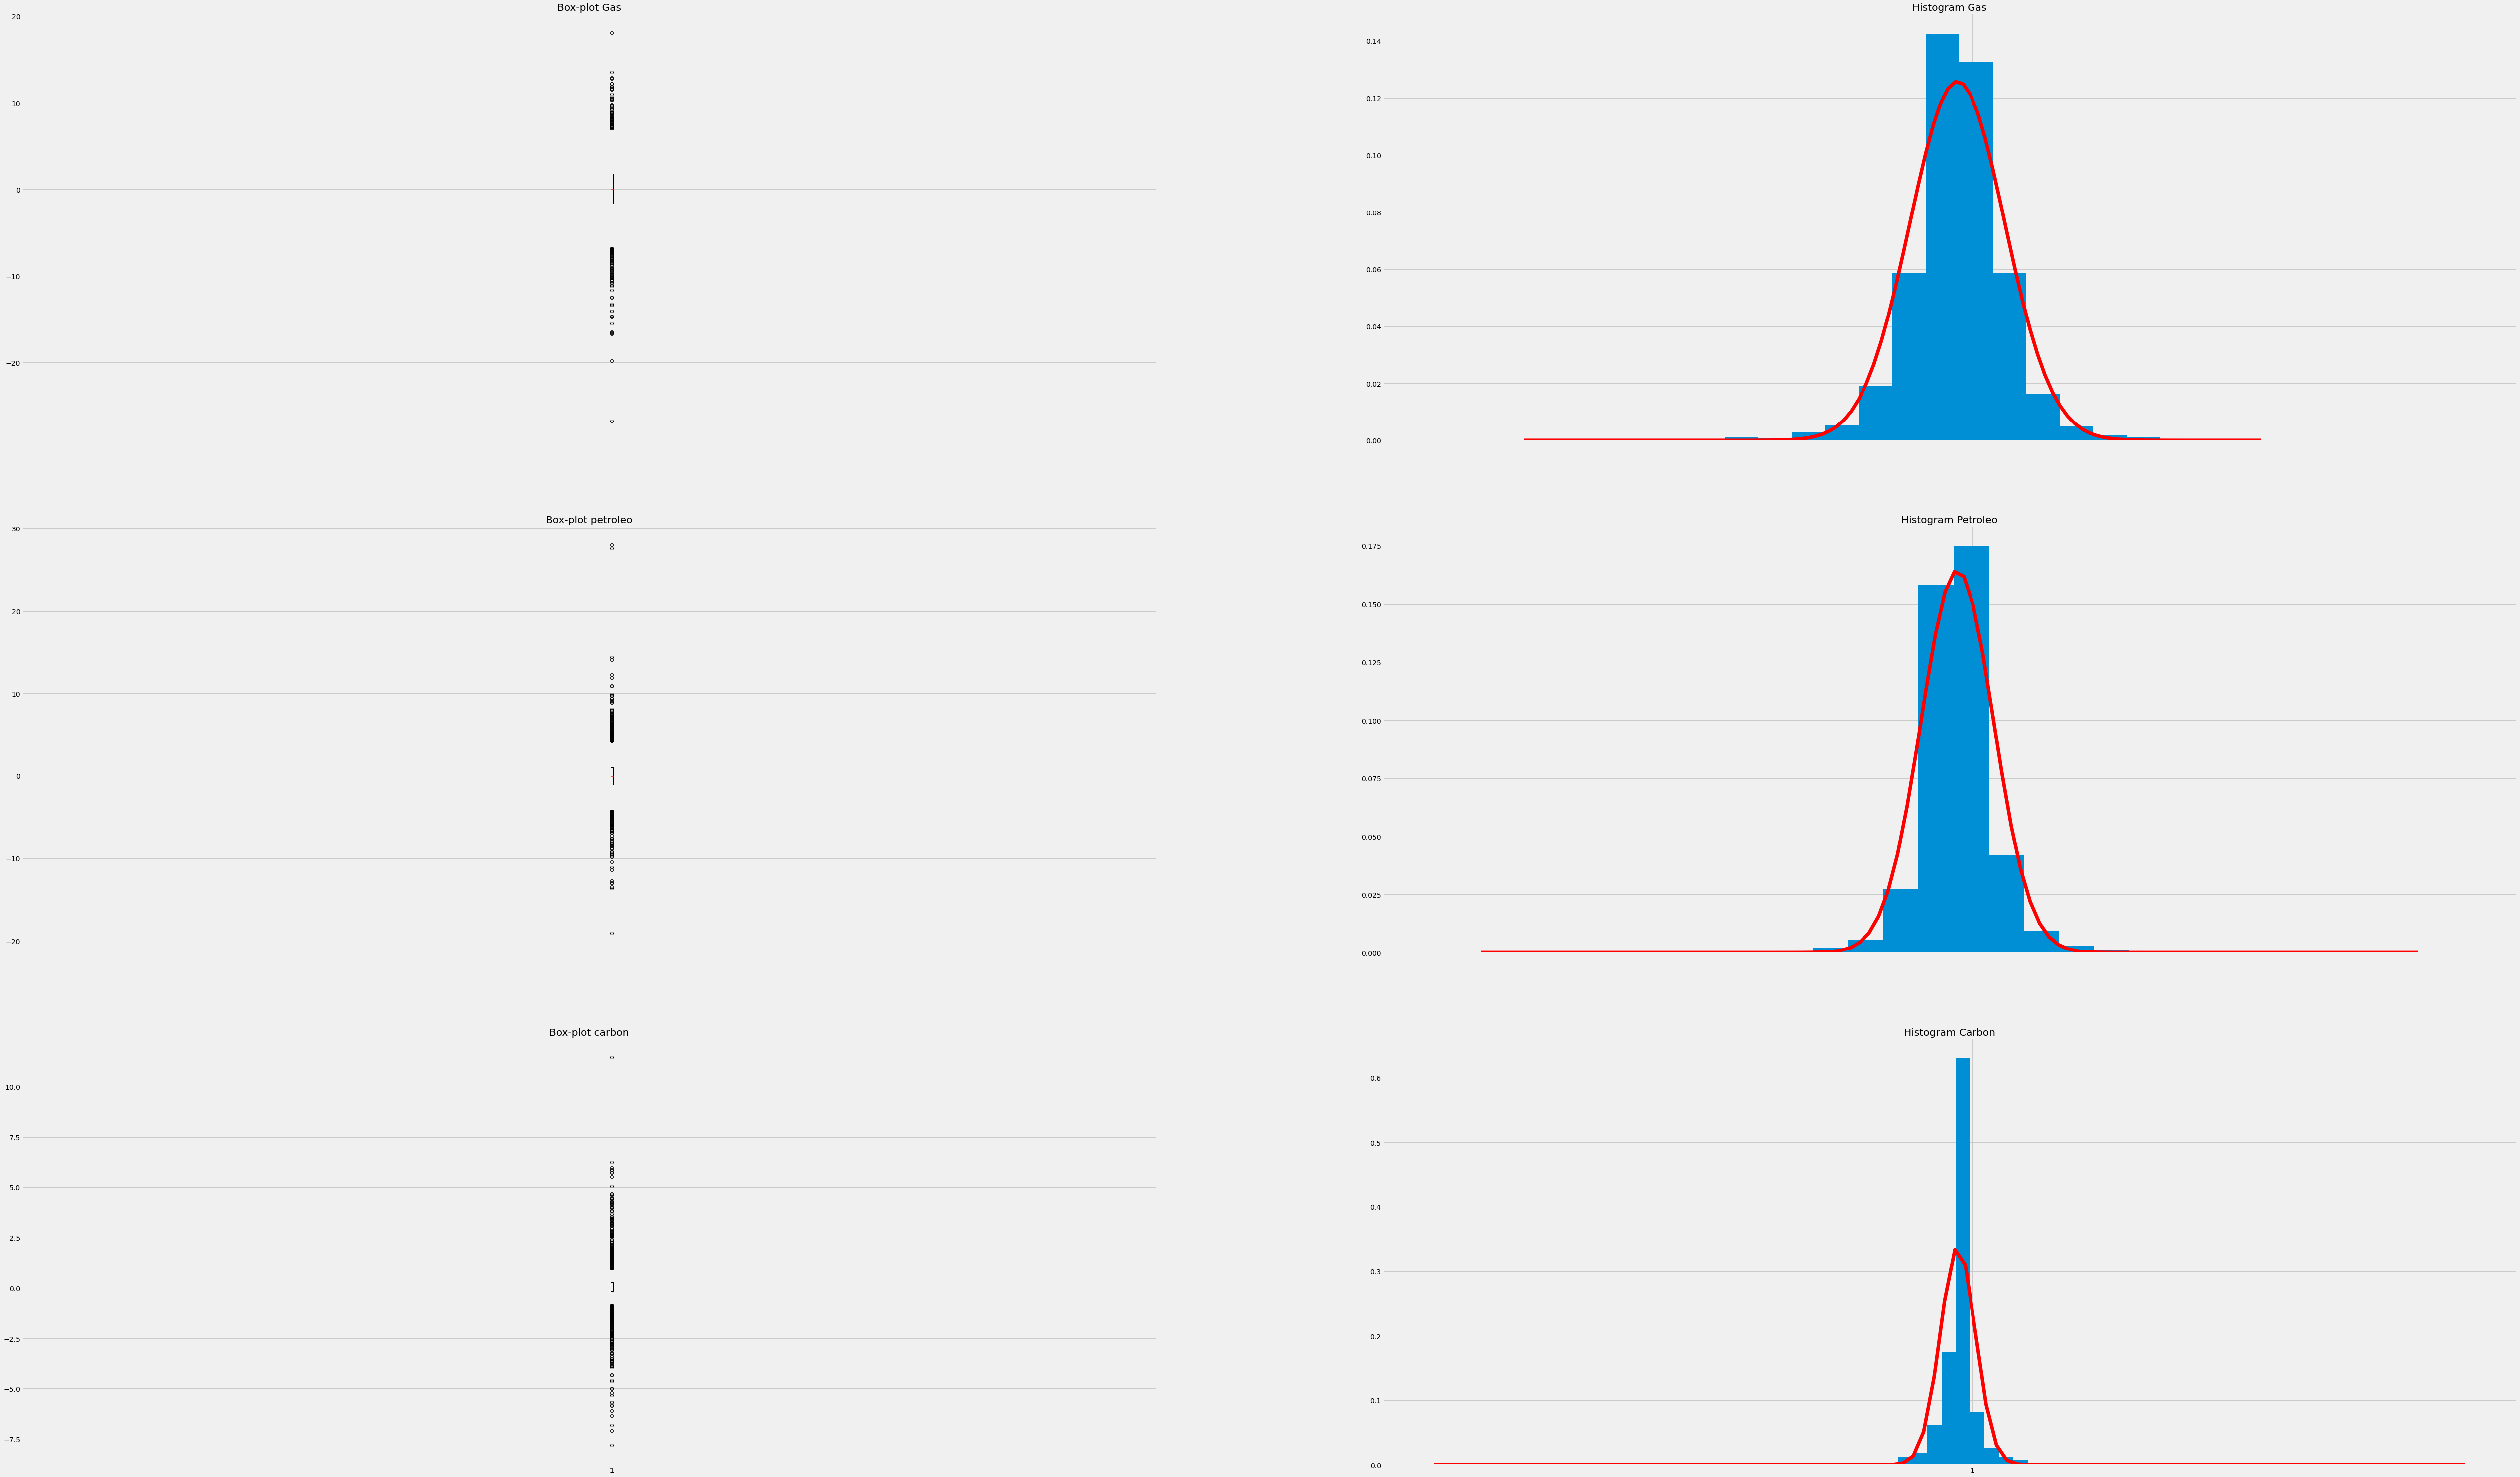

In [119]:
fig, ax = plt.subplots(figsize = (80, 50), nrows=3, ncols=2, sharex=True)

##################### GAS ###########################
# BOX-PLOT
ax[0,0].boxplot(gas_return)
ax[0,0].set_title('Box-plot Gas')
# HISTOGRAM
ax[0,1].hist(gas_return, 20, density=1)
ax[0,1].set_title('Histogram Gas')
addNorm(gas_return, ax[0,1])
##################### PETROLEO ###########################
# BOX-PLOT
ax[1,0].boxplot(petroleo_return)
ax[1,0].set_title('Box-plot petroleo')
# HISTOGRAM
ax[1,1].hist(petroleo_return, 20, density=1)
ax[1,1].set_title('Histogram Petroleo')
addNorm(petroleo_return, ax[1,1])
##################### CARBON ###########################
# BOX-PLOT
ax[2,0].boxplot(carbon_return)
ax[2,0].set_title('Box-plot carbon')
# HISTOGRAM
ax[2,1].hist(carbon_return, 20, density=1)
ax[2,1].set_title('Histogram Carbon')
addNorm(carbon_return, ax[2,1])

# QQ-Plot

((array([-3.43451557, -3.18633264, -3.04883771, ...,  3.04883771,
          3.18633264,  3.43451557]),
  array([-7.81710753, -7.08099715, -6.81528882, ...,  5.96746749,
          6.22482624, 11.46291696])),
 (1.0508378553327837, 0.031471085415237264, 0.8907754545221117))

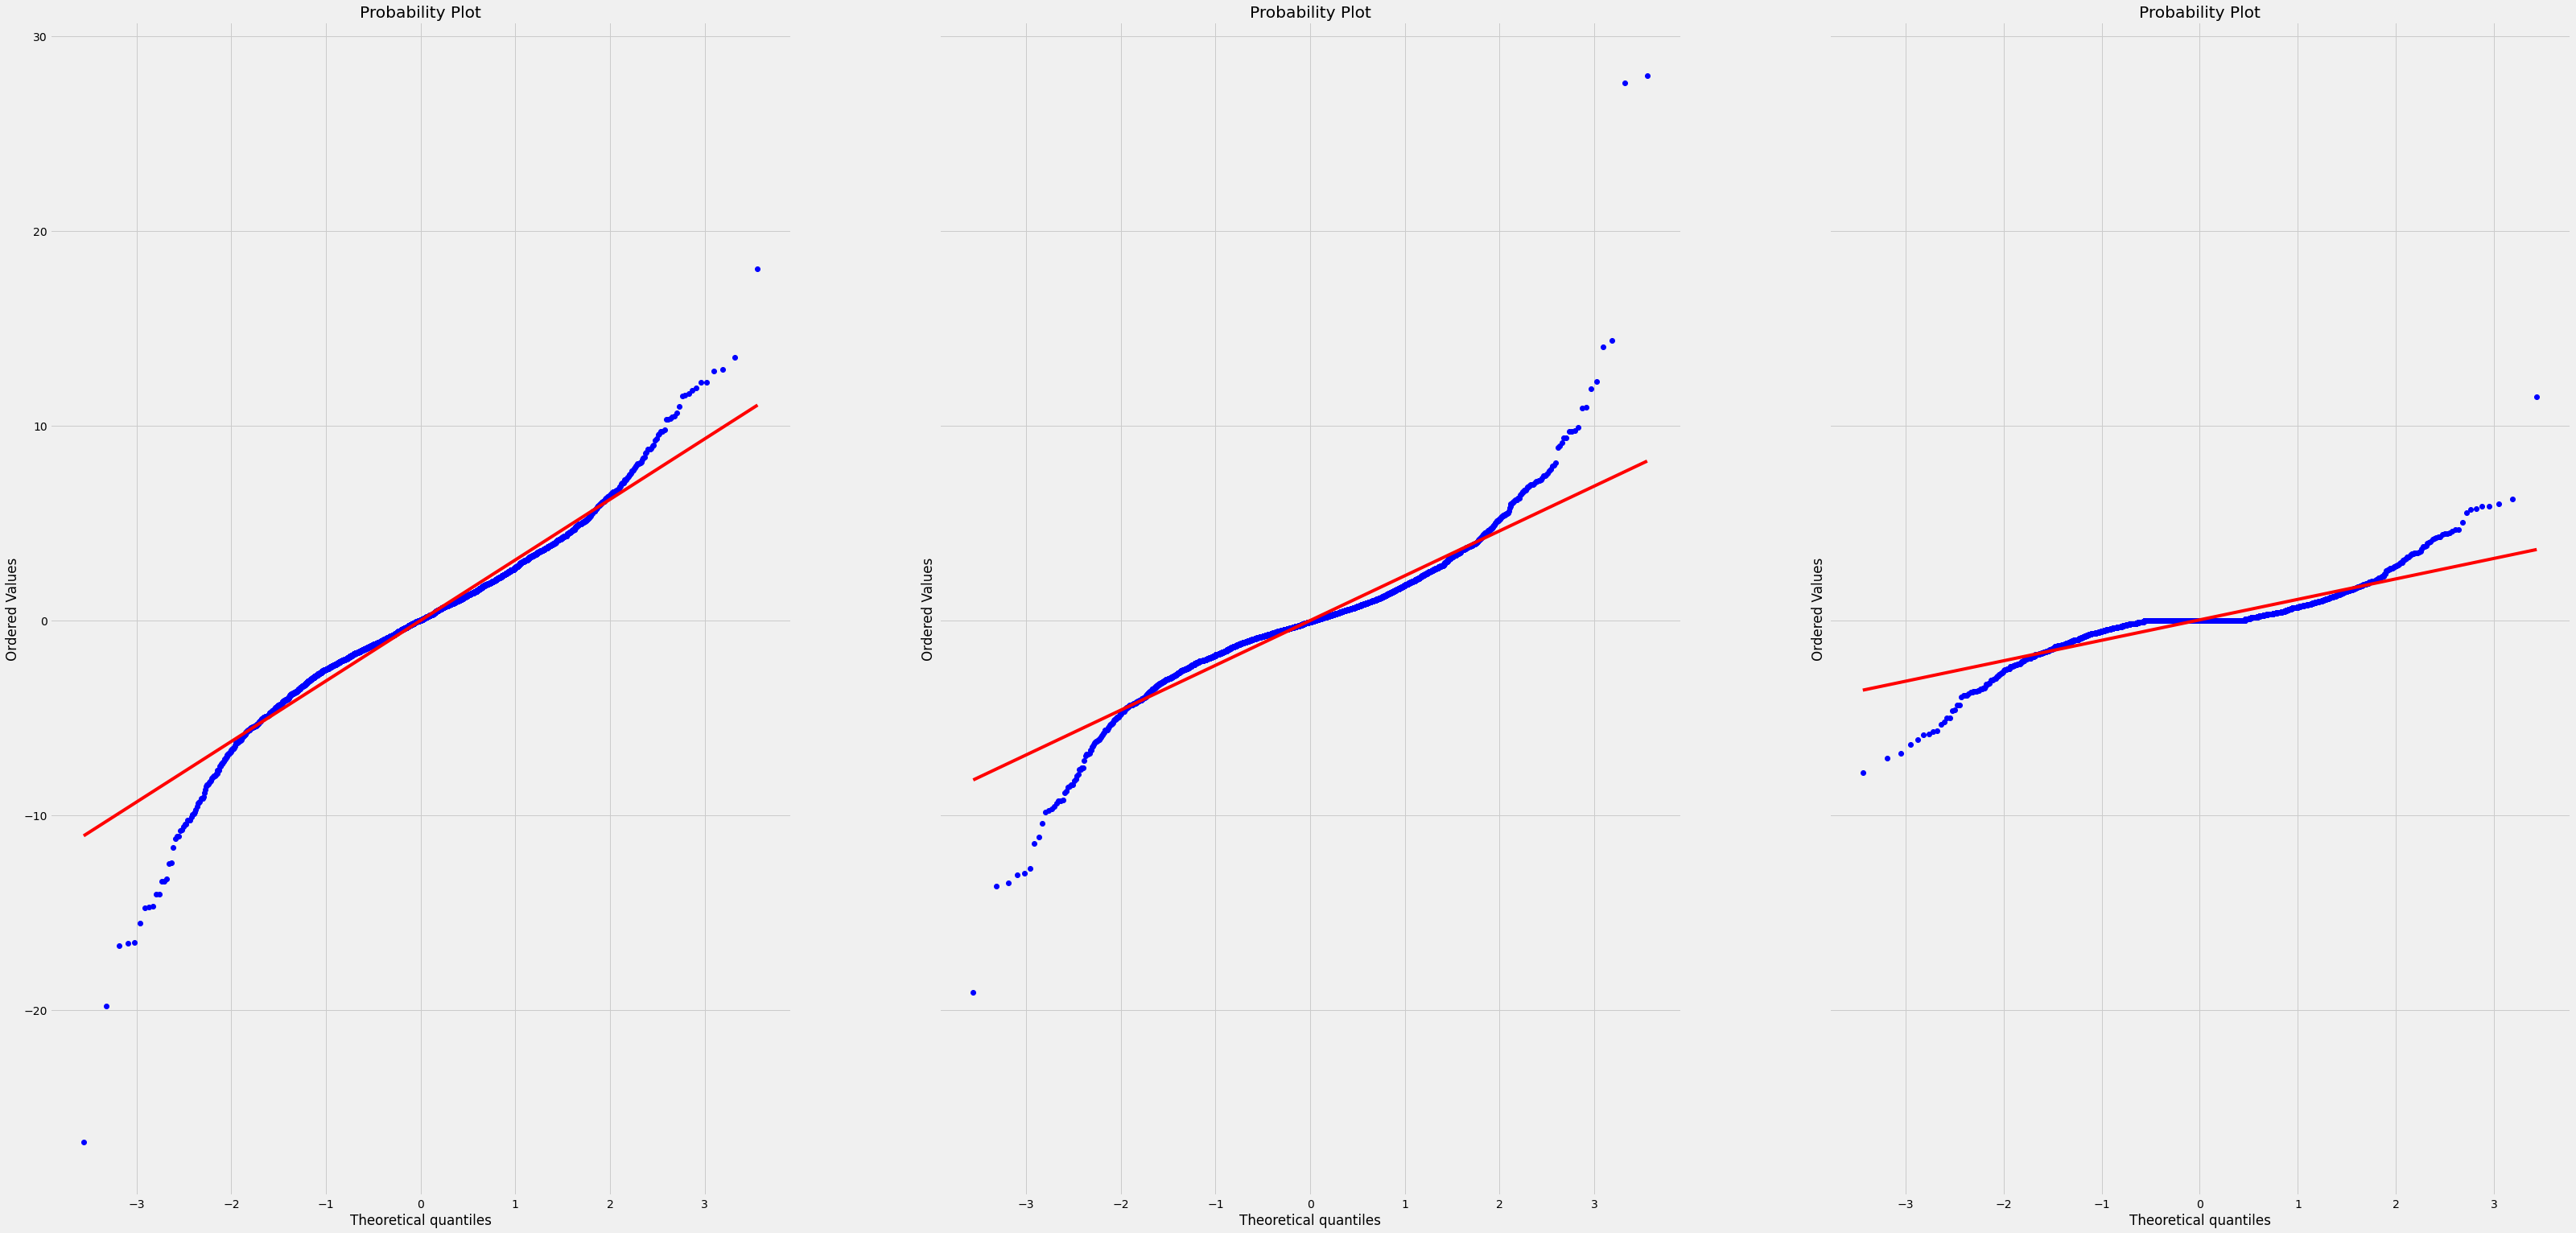

In [115]:
fig, ax = plt.subplots(figsize = (50, 25), nrows=1, ncols=3, sharey=True)

##################### GAS ###########################
# QQ-PLOT
stats.probplot(gas_return, dist="norm", plot=ax[0])
##################### PETROLEO ###########################
# QQ-PLOT
stats.probplot(petroleo_return, dist="norm", plot=ax[1])
##################### CARBON ###########################
# QQ-PLOT
stats.probplot(carbon_return, dist="norm", plot=ax[2])

# Correlograms

# Taylor Effect

# Leverage Effect